In [53]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

DETECT FACES AND EYES

In [54]:
img = cv2.imread("C:/Labware/Player-Image-Classifier/images/ronaldo/Cristiano-Ronaldo (1).jpg")
img.shape

(2978, 1987, 3)

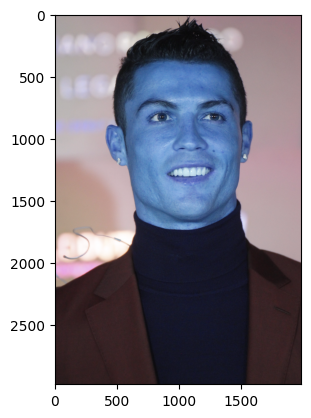

In [55]:
plt.imshow(img)

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2978, 1987)

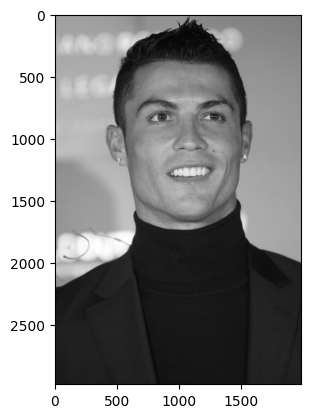

In [57]:
plt.imshow(gray, cmap='gray')

In [58]:
face_cascade = cv2.CascadeClassifier("C:/Labware/Player-Image-Classifier/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('C:/Labware/Player-Image-Classifier/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 469,  367, 1195, 1195]])

In [59]:
(x,y,w,h) = faces[0]
x,y,w,h

(469, 367, 1195, 1195)

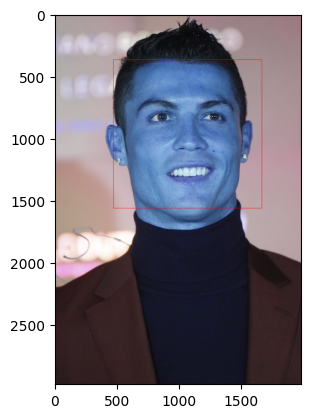

In [60]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

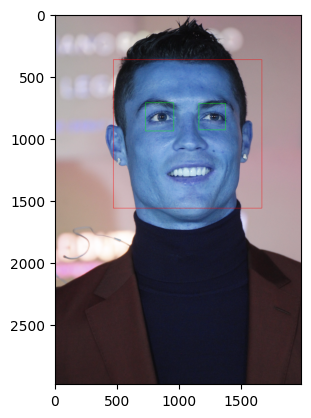

In [61]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

CROPPING THE FACIAL REGION

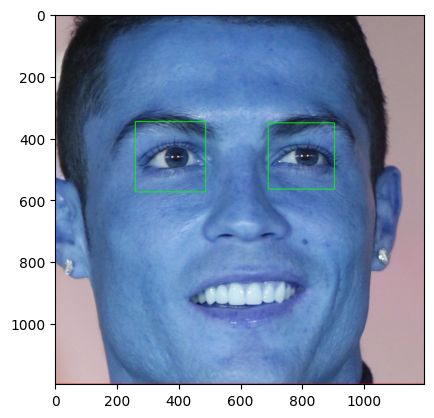

In [62]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [63]:
cropped_img = np.array(roi_color)
cropped_img.shape

(1195, 1195, 3)

USING WAVELET TRANSFORM AS A FEATURE TO TRAIN OUR MODEL

In [64]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

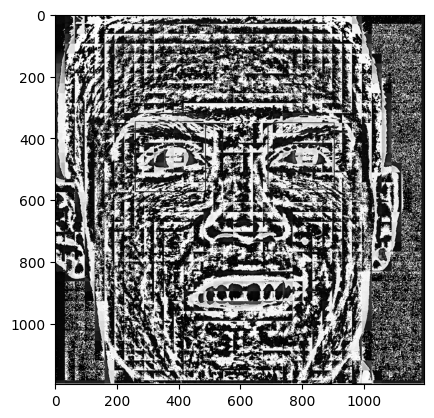

In [65]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

LOAD IMAGE AND DATECT FACE

In [66]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [67]:
path_to_data = "C:/Labware/Player-Image-Classifier/images"
path_to_cr_data = "C:/Labware/Player-Image-Classifier/images/cropped"

In [68]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [69]:
img_dirs

['C:/Labware/Player-Image-Classifier/images\\anushka',
 'C:/Labware/Player-Image-Classifier/images\\deepika',
 'C:/Labware/Player-Image-Classifier/images\\federer',
 'C:/Labware/Player-Image-Classifier/images\\katrina',
 'C:/Labware/Player-Image-Classifier/images\\messi',
 'C:/Labware/Player-Image-Classifier/images\\ronaldo']

In [70]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [71]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Labware/Player-Image-Classifier/images/croppedanushka
Generating cropped images in folder:  C:/Labware/Player-Image-Classifier/images/croppeddeepika
Generating cropped images in folder:  C:/Labware/Player-Image-Classifier/images/croppedfederer
Generating cropped images in folder:  C:/Labware/Player-Image-Classifier/images/croppedkatrina
Generating cropped images in folder:  C:/Labware/Player-Image-Classifier/images/croppedmessi
Generating cropped images in folder:  C:/Labware/Player-Image-Classifier/images/croppedronaldo


In [72]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedanushka': ['C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka1.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka10.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka11.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka12.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka13.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka14.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka15.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka16.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka17.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka18.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka19.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\\anushka2.png',
  'C:/Labware/Player-Image-Classifier/images/croppedanushka\

In [73]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedanushka': 0,
 'croppeddeepika': 1,
 'croppedfederer': 2,
 'croppedkatrina': 3,
 'croppedmessi': 4,
 'croppedronaldo': 5}

MODEL TRAINING

In [74]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [75]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(215, 4096)

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5185185185185185

In [78]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.20      0.20      0.20         5
           2       0.89      0.62      0.73        13
           3       0.38      0.43      0.40         7
           4       0.64      0.88      0.74        16
           5       0.00      0.00      0.00         5

    accuracy                           0.52        54
   macro avg       0.39      0.39      0.39        54
weighted avg       0.51      0.52      0.50        54



TRYING OUT DIFFERENT MODELS

In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [82]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\zayed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\zayed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\zayed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\zayed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_mo

,model,best_score,best_params
0,svm,0.584091,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.385417,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.602273,{'logisticregression__C': 1}


In [83]:
best_estimators['svm'].score(X_test,y_test)

0.5740740740740741

In [84]:
best_estimators['random_forest'].score(X_test,y_test)

0.3888888888888889

In [85]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6111111111111112

In [87]:
best_clf = best_estimators['logistic_regression']

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 2,  3,  0,  3,  0,  0],
       [ 2,  2,  0,  0,  1,  0],
       [ 1,  0,  9,  0,  3,  0],
       [ 2,  0,  0,  5,  0,  0],
       [ 1,  0,  1,  1, 12,  1],
       [ 0,  0,  0,  0,  2,  3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

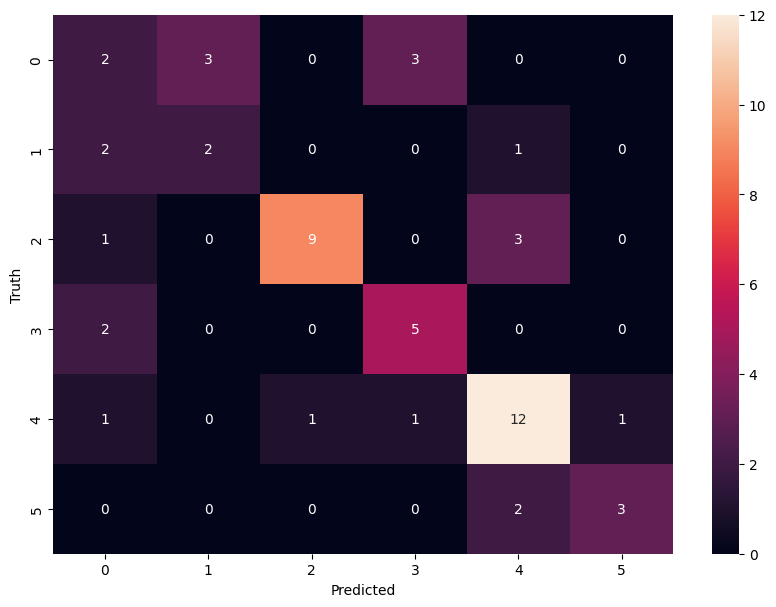

In [89]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [91]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))